pulse signal

In [2]:
import numpy as np
import matplotlib.pyplot as plt

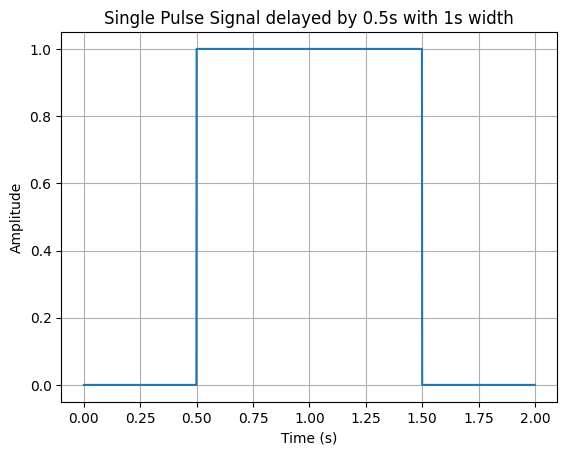

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1000  # Sampling frequency (Hz)
T = 2  # Total duration (seconds), extended to cover delay
pulse_width = 1  # Width of the single pulse (seconds)
delay = 0.5  # Delay of the pulse (seconds)

# Time vector
t = np.arange(0, T, 1 / fs)

# Generate a delayed single pulse
pulse = np.zeros_like(t)
pulse[(t >= delay) & (t < delay + pulse_width)] = 1  # Pulse delayed by 1 second

# Plot the signal
plt.plot(t, pulse)
plt.title(f"Single Pulse Signal delayed by {delay}s with {pulse_width}s width")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

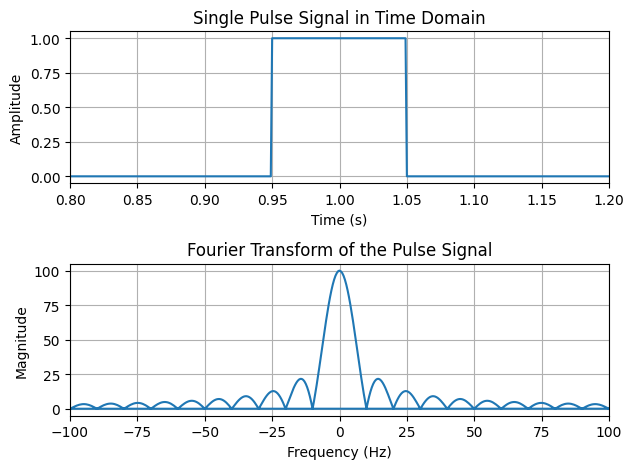

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1000  # Sampling frequency (Hz)
T = 2  # Total duration (seconds)
pulse_width = 0.1  # Width of the single pulse (seconds)
delay = 0.95  # Delay of the pulse (seconds)

# Time vector
t = np.arange(0, T, 1 / fs)

# Generate a delayed single pulse
pulse = np.zeros_like(t)
pulse[(t >= delay) & (t < delay + pulse_width)] = 1  # Pulse delayed by 1 second

# Compute the Fourier Transform
pulse_fft = np.fft.fft(pulse)
# Get the frequencies corresponding to the FFT values
frequencies = np.fft.fftfreq(len(t), 1 / fs)

# Compute the magnitude of the Fourier Transform
magnitude = np.abs(pulse_fft)

# Plot the pulse signal (time domain)
plt.subplot(2, 1, 1)
plt.plot(t, pulse)
plt.xlim(0.8, 1.2)
plt.title("Single Pulse Signal in Time Domain")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Plot the Fourier Transform (magnitude spectrum)
plt.subplot(2, 1, 2)
plt.plot(frequencies, magnitude)
# limit frequency to -100 to 100 hz
plt.xlim(-100, 100)
plt.title("Fourier Transform of the Pulse Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)

plt.tight_layout()
plt.show()

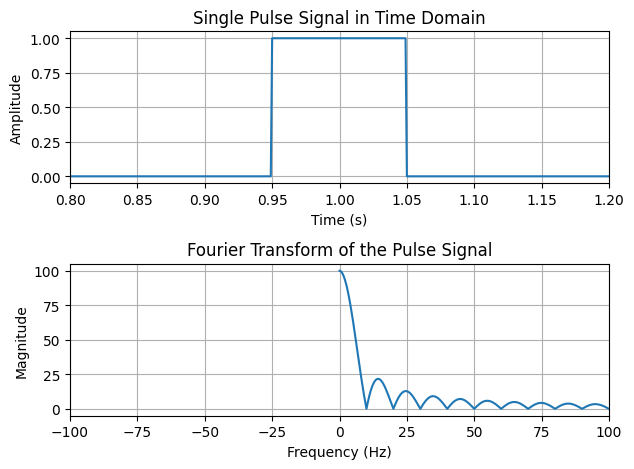

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1000  # Sampling frequency (Hz)
T = 2  # Total duration (seconds)
pulse_width = 0.1  # Width of the single pulse (seconds)
delay = 0.95  # Delay of the pulse (seconds)

# Time vector
t = np.arange(0, T, 1 / fs)

# Generate a delayed single pulse
pulse = np.zeros_like(t)
pulse[(t >= delay) & (t < delay + pulse_width)] = 1  # Pulse delayed by 1 second

# Compute the Fourier Transform
pulse_fft = np.fft.fft(pulse)
# Get the frequencies corresponding to the FFT values
frequencies = np.fft.fftfreq(len(t), 1 / fs)

# Compute the magnitude of the Fourier Transform
magnitude = np.abs(pulse_fft)

# Plot the pulse signal (time domain)
plt.subplot(2, 1, 1)
plt.plot(t, pulse)
plt.xlim(0.8, 1.2)  # Zoom into the pulse
plt.title("Single Pulse Signal in Time Domain")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Plot the Fourier Transform (magnitude spectrum)
plt.subplot(2, 1, 2)
# Plot only the positive frequencies for clarity
plt.plot(frequencies[: len(frequencies) // 2], magnitude[: len(magnitude) // 2])
# Limit the frequency to 0 to 100 Hz
plt.xlim(-100, 100)
plt.title("Fourier Transform of the Pulse Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)

plt.tight_layout()
plt.show()

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import gradio as gr


# Function to generate the pulse signal and its Fourier Transform
def generate_pulse(frequency, fs=1000, T=2, pulse_width=0.1, delay=0.95):
    # Time vector
    t = np.arange(0, T, 1 / fs)

    # Generate a delayed single pulse
    pulse = np.zeros_like(t)
    pulse[(t >= delay) & (t < delay + pulse_width)] = 1  # Pulse delayed

    # Compute the Fourier Transform
    pulse_fft = np.fft.fft(pulse)
    # Get the frequencies corresponding to the FFT values
    frequencies = np.fft.fftfreq(len(t), 1 / fs)
    # Compute the magnitude of the Fourier Transform
    magnitude = np.abs(pulse_fft)

    # Plot the time domain signal (pulse)
    fig, ax = plt.subplots(2, 1, figsize=(10, 6))

    ax[0].plot(t, pulse)
    ax[0].set_xlim(0.8, 1.2)  # Zoom into the pulse
    ax[0].set_title("Single Pulse Signal in Time Domain")
    ax[0].set_xlabel("Time (s)")
    ax[0].set_ylabel("Amplitude")
    ax[0].grid(True)

    # Plot the Fourier Transform (magnitude spectrum)
    ax[1].plot(frequencies[: len(frequencies) // 2], magnitude[: len(magnitude) // 2])
    ax[1].set_xlim(0, frequency)  # Limit frequency based on user input
    ax[1].set_title("Fourier Transform of the Pulse Signal")
    ax[1].set_xlabel("Frequency (Hz)")
    ax[1].set_ylabel("Magnitude")
    ax[1].grid(True)

    plt.tight_layout()

    # Save the plot to a file and return the file path
    plt.savefig("pulse_fft_plot.png")
    return "pulse_fft_plot.png"


# Define the Gradio interface
demo = gr.Interface(
    fn=generate_pulse,
    inputs=gr.Slider(50, 500, value=100, label="Frequency Range (Hz)"),
    outputs="image",
    description="Adjust the frequency range and observe the time-domain pulse signal and its Fourier Transform.",
)

# Launch the demo
demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [43]:
import numpy as np
import plotly.graph_objs as go
import gradio as gr


# Function to generate the pulse signal and its Fourier Transform
def generate_pulse(frequency, fs=1000, T=2, pulse_width=0.1, delay=0.95):
    # Time vector
    t = np.arange(0, T, 1 / fs)

    # Generate a delayed single pulse
    pulse = np.zeros_like(t)
    pulse[(t >= delay) & (t < delay + pulse_width)] = 1  # Pulse delayed

    # Compute the Fourier Transform
    pulse_fft = np.fft.fft(pulse)
    # Get the frequencies corresponding to the FFT values
    frequencies = np.fft.fftfreq(len(t), 1 / fs)
    # Compute the magnitude of the Fourier Transform
    magnitude = np.abs(pulse_fft)

    # Create interactive plot for time domain signal (pulse) using Plotly
    time_fig = go.Figure()
    time_fig.add_trace(go.Scatter(x=t, y=pulse, mode="lines", name="Pulse Signal"))
    time_fig.update_layout(
        title="Single Pulse Signal in Time Domain",
        xaxis_title="Time (s)",
        yaxis_title="Amplitude",
        xaxis_range=[0.8, 1.2],  # Zoom into the pulse
        template="plotly_white",
    )

    # Create interactive plot for Fourier Transform (magnitude spectrum) using Plotly
    freq_fig = go.Figure()
    freq_fig.add_trace(
        go.Scatter(
            x=frequencies[: len(frequencies) // 2],
            y=magnitude[: len(magnitude) // 2],
            mode="lines",
            name="FFT Magnitude",
        )
    )
    freq_fig.update_layout(
        title="Fourier Transform of the Pulse Signal",
        xaxis_title="Frequency (Hz)",
        yaxis_title="Magnitude",
        xaxis_range=[0, frequency],  # Limit frequency based on user input
        template="plotly_white",
    )

    # Return both plots as interactive Plotly figures
    return time_fig, freq_fig


# Define the Gradio interface
demo = gr.Interface(
    fn=generate_pulse,
    inputs=gr.Slider(50, 500, value=100, label="Frequency Range (Hz)"),
    outputs=[
        gr.Plot(),
        gr.Plot(),
    ],  # Two plot outputs: time domain and frequency domain
    description="Adjust the frequency range and observe the time-domain pulse signal and its Fourier Transform.",
)

# Launch the demo
demo.launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [3]:
import numpy as np
import plotly.graph_objs as go
import gradio as gr


# Function to generate the pulse signal, its Fourier Transform, and Inverse Fourier Transform
def generate_pulse(frequency, fs=1000, T=2, pulse_width=0.1, delay=0.95):
    # Time vector
    t = np.arange(0, T, 1 / fs)

    # Generate a delayed single pulse
    pulse = np.zeros_like(t)
    pulse[(t >= delay) & (t < delay + pulse_width)] = 1  # Pulse delayed

    # Compute the Fourier Transform
    pulse_fft = np.fft.fft(pulse)
    # Get the frequencies corresponding to the FFT values
    frequencies = np.fft.fftfreq(len(t), 1 / fs)
    # Compute the magnitude of the Fourier Transform
    magnitude = np.abs(pulse_fft)

    # Compute the Inverse Fourier Transform
    reconstructed_signal = np.fft.ifft(
        pulse_fft
    ).real  # Only real part for time-domain signal

    # Create interactive plot for time-domain signal (original pulse) using Plotly
    time_fig = go.Figure()
    time_fig.add_trace(
        go.Scatter(x=t, y=pulse, mode="lines", name="Original Pulse Signal")
    )
    time_fig.update_layout(
        title="Original Pulse Signal in Time Domain",
        xaxis_title="Time (s)",
        yaxis_title="Amplitude",
        xaxis_range=[0.8, 1.2],  # Zoom into the pulse
        template="plotly_white",
    )

    # Create interactive plot for Fourier Transform (magnitude spectrum) using Plotly
    freq_fig = go.Figure()
    freq_fig.add_trace(
        go.Scatter(
            x=frequencies[: len(frequencies) // 2],
            y=magnitude[: len(magnitude) // 2],
            mode="lines",
            name="FFT Magnitude",
        )
    )
    freq_fig.update_layout(
        title="Fourier Transform of the Pulse Signal",
        xaxis_title="Frequency (Hz)",
        yaxis_title="Magnitude",
        xaxis_range=[0, frequency],  # Limit frequency based on user input
        template="plotly_white",
    )

    # Create interactive plot for the reconstructed signal (Inverse FFT) using Plotly
    inv_time_fig = go.Figure()
    inv_time_fig.add_trace(
        go.Scatter(
            x=t, y=reconstructed_signal, mode="lines", name="Reconstructed Signal"
        )
    )
    inv_time_fig.update_layout(
        title="Reconstructed Signal from Inverse Fourier Transform",
        xaxis_title="Time (s)",
        yaxis_title="Amplitude",
        xaxis_range=[0.8, 1.2],  # Zoom into the pulse region
        template="plotly_white",
    )

    # Return the three plots (original time domain, Fourier Transform, and reconstructed time domain)
    return time_fig, freq_fig, inv_time_fig


# Define the Gradio interface
demo = gr.Interface(
    fn=generate_pulse,
    inputs=gr.Slider(50, 500, value=100, label="Frequency Range (Hz)"),
    outputs=[
        gr.Plot(),
        gr.Plot(),
        gr.Plot(),
    ],  # Three plot outputs: original signal, FFT, and reconstructed signal
    description="Adjust the frequency range and observe the time-domain pulse signal, its Fourier Transform, and the reconstructed signal from the Inverse Fourier Transform.",
)

# Launch the demo
demo.launch()

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


In [1]:
import numpy as np
import plotly.graph_objs as go
import gradio as gr


# Function to generate the pulse signal, its Fourier Transform, and Inverse Fourier Transform
def generate_pulse(
    coefficients, frequency=100, fs=1000, T=2, pulse_width=0.1, delay=0.95
):
    # Time vector
    t = np.arange(0, T, 1 / fs)

    # Generate a delayed single pulse
    pulse = np.zeros_like(t)
    pulse[(t >= delay) & (t < delay + pulse_width)] = 1  # Pulse delayed

    # Compute the Fourier Transform
    pulse_fft = np.fft.fft(pulse)
    # Get the frequencies corresponding to the FFT values
    frequencies = np.fft.fftfreq(len(t), 1 / fs)
    # Compute the magnitude of the Fourier Transform
    magnitude = np.abs(pulse_fft)

    # Truncate Fourier coefficients to first 100 components
    truncated_fft = np.zeros_like(pulse_fft)
    truncated_fft[:coefficients] = pulse_fft[
        :coefficients
    ]  # Keep only the first 100 coefficients

    # Compute the Inverse Fourier Transform from truncated coefficients
    reconstructed_signal = np.fft.ifft(
        truncated_fft
    ).real  # Only real part for time-domain signal

    # Create interactive plot for time-domain signal (original pulse) using Plotly
    time_fig = go.Figure()
    time_fig.add_trace(
        go.Scatter(x=t, y=pulse, mode="lines", name="Original Pulse Signal")
    )
    time_fig.update_layout(
        title="Original Pulse Signal in Time Domain",
        xaxis_title="Time (s)",
        yaxis_title="Amplitude",
        xaxis_range=[0.8, 1.2],  # Zoom into the pulse
        template="plotly_white",
    )

    # Create interactive plot for Fourier Transform (magnitude spectrum) using Plotly
    freq_fig = go.Figure()
    freq_fig.add_trace(
        go.Scatter(
            x=frequencies[: len(frequencies) // 2],
            y=magnitude[: len(magnitude) // 2],
            mode="lines",
            name="FFT Magnitude",
        )
    )
    freq_fig.update_layout(
        title="Fourier Transform of the Pulse Signal",
        xaxis_title="Frequency (Hz)",
        yaxis_title="Magnitude",
        xaxis_range=[0, frequency],  # Limit frequency based on user input
        template="plotly_white",
    )

    # Create interactive plot for the reconstructed signal (Inverse FFT from first 100 coefficients) using Plotly
    inv_time_fig = go.Figure()
    inv_time_fig.add_trace(
        go.Scatter(
            x=t,
            y=reconstructed_signal,
            mode="lines",
            name="Reconstructed Signal (100 Coeffs)",
        )
    )
    inv_time_fig.update_layout(
        title="Reconstructed Signal from First 100 Fourier Coefficients",
        xaxis_title="Time (s)",
        yaxis_title="Amplitude",
        xaxis_range=[0.8, 1.2],  # Zoom into the pulse region
        template="plotly_white",
    )

    # Return the three plots (original time domain, Fourier Transform, and reconstructed time domain from 100 coefficients)
    return time_fig, freq_fig, inv_time_fig


# Define the Gradio interface
demo = gr.Interface(
    fn=generate_pulse,
    inputs=gr.Slider(50, 500, value=100, label="Number of Fourier Coefficients"),
    outputs=[
        gr.Plot(),
        gr.Plot(),
        gr.Plot(),
    ],  # Three plot outputs: original signal, FFT, and reconstructed signal
    description="Adjust the frequency range and observe the time-domain pulse signal, its Fourier Transform, and the reconstructed signal from only the first 100 Fourier coefficients.",
)

# Launch the demo
demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
